### Exploratory Data Analysis- Sample Super Store

### by Venkatesan M

In [147]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

### Detailed Exploratory Data Analysis
#### Dataset- SampleSuperstore

### 1. Loading Super store dataset

In [2]:
stores=pd.read_csv('./Downloads/SampleSuperstore.csv')

In [3]:
stores.head(5)

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
stores.shape

(9994, 13)

In [101]:
stores.max()

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City                      Yuma
State                  Wyoming
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                  22638.5
Quantity                    14
Discount                   0.8
Profit                 8399.98
dtype: object

In [102]:
stores.min()

Ship Mode         First Class
Segment              Consumer
Country         United States
City                 Aberdeen
State                 Alabama
Postal Code              1040
Region                Central
Category            Furniture
Sub-Category      Accessories
Sales                   0.444
Quantity                    1
Discount                    0
Profit               -6599.98
dtype: object

#### 1.1 checking null values in dataset

In [5]:
stores.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## 2. Profit and Sales

### 2.1 minimum and maximum sales and profit
#### Minimum Sales: 0.444
#### Maximum Sales: 22638.480

#### Minimum Profit: -6599.978
#### Maximum Profit: 8399.976

In [6]:
stores[['Sales', 'Profit']].describe().T

count        mean         std       min       25%      50%      75%  \
Sales   9994.0  229.858001  623.245101     0.444  17.28000  54.4900  209.940   
Profit  9994.0   28.656896  234.260108 -6599.978   1.72875   8.6665   29.364   

              max  
Sales   22638.480  
Profit   8399.976

### 2.2 citywise maximum sales and profit 

In [7]:
df=stores.copy()
agg=df.groupby('City').sum()
agg.head()

Postal Code     Sales  Quantity  Discount    Profit
City                                                            
Aberdeen           57401    25.500         3       0.0    6.6300
Abilene            79605     1.392         2       0.8   -3.7584
Akron             930552  2729.986        65       7.5 -186.6356
Albuquerque      1219470  2220.160        65       0.8  634.0881
Alexandria        356864  5519.570        84       0.0  318.6183

#### 2.3 Total Sales across all the region
#### Top City Sales

In [13]:
City=list(agg.index)

In [14]:
Max_sale=[agg['Sales'].loc[c] for c in City]
print('Total Sales across all the regions $',sum(np.cumsum(Max_sale)))
print('Top Sales City $',np.max(Max_sale))
list(zip(City, Max_sale))

df=pd.DataFrame([City, Max_sale]).T
df.columns=['City', 'Max_Sales']
df
df.sort_values(by='Max_Sales',ascending=False).head()

Total Sales across all the regions $ 571848655.7465003
Top Sales City $ 256368.161


City Max_Sales
329  New York City    256368
266    Los Angeles    175851
452        Seattle    119541
438  San Francisco    112669
374   Philadelphia    109077

### 2.3a pivot table to find top low and high city sales

### Top low Sales

In [15]:
pd.pivot_table(stores, 'Sales', 'City', aggfunc='sum').nsmallest(5, 'Sales')

Sales
City               
Abilene       1.392
Elyria        1.824
Jupiter       2.064
Pensacola     2.214
Ormond Beach  2.808

### top city sales

In [16]:
pd.pivot_table(stores, 'Sales', 'City', aggfunc='sum').nlargest(5, 'Sales')

Sales
City                     
New York City  256368.161
Los Angeles    175851.341
Seattle        119540.742
San Francisco  112669.092
Philadelphia   109077.013

In [17]:
# fig=plt.figure(figsize=(6,4), dpi=100)
# ax=fig.subplots()

# pd.pivot_table(stores, 'Sales', 'City', aggfunc='sum').nlargest(5, 'Sales').plot.bar(y='Sales', ax=ax)
# plt.title('Top City Sales')

px.bar(pd.pivot_table(stores, 'Sales', 'City', aggfunc='sum').nlargest(5, 'Sales'))

Text(0.5, 1.0, 'Top City Sales')

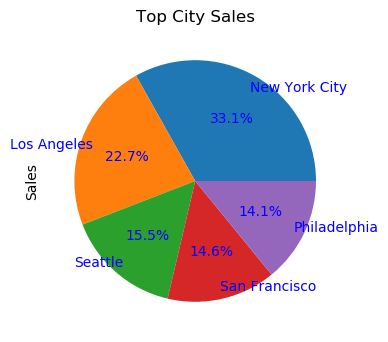

In [19]:
fig=plt.figure(figsize=(6,4), dpi=100)
ax=fig.subplots()

pd.pivot_table(stores, 'Sales', 'City', aggfunc='sum').nlargest(5, 'Sales').plot.pie(y='Sales', ax=ax,
                                                                                     autopct='%0.1f%%',
                                                                                     legend=False, 
                                                                                     labeldistance=0.9, 
                                                                                     textprops=dict(color='b'))
plt.title('Top City Sales')

#### Total profit  and top city profit

In [20]:
Max_Profit=[agg['Profit'].loc[c] for c in City]
print('Total Profit across all the regions $', sum(np.cumsum(Max_Profit)))
print('Top City Profit $', np.max(Max_Profit))
list(zip(City, Max_Profit))

df=pd.DataFrame([City, Max_Profit]).T
df.columns=['City', 'Max_Profit']
df
df.sort_values(by='Max_Profit',ascending=False)


Total Profit across all the regions $ 64008778.738699995
Top City Profit $ 62036.98369999999


City Max_Profit
329  New York City      62037
266    Los Angeles    30440.8
452        Seattle    29156.1
438  San Francisco    17507.4
123        Detroit    13181.8
..             ...        ...
80         Chicago   -6654.57
241      Lancaster   -7239.07
434    San Antonio   -7299.05
207        Houston   -10153.5
374   Philadelphia   -13837.8

[531 rows x 2 columns]

### pivot table to find maximum Citywise Profit

In [21]:
pd.pivot_table(stores, 'Profit', 'City', aggfunc='sum').nlargest(5, 'Profit')

Profit
City                     
New York City  62036.9837
Los Angeles    30440.7579
Seattle        29156.0967
San Francisco  17507.3854
Detroit        13181.7908

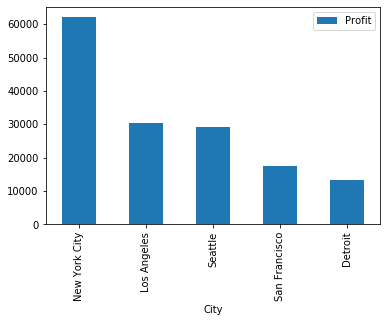

In [22]:
pd.pivot_table(stores, 'Profit', 'City', aggfunc='sum').nlargest(5, 'Profit').plot.bar() 

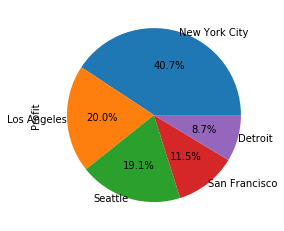

In [23]:
pd.pivot_table(stores, 'Profit', 'City', aggfunc='sum').nlargest(5, 'Profit').plot.pie(y='Profit',
                                                                                     labeldistance=1, 
                                                                                     autopct='%0.1f%%',
                                                                                     legend=False) 

In [24]:
pd.pivot_table(stores, 'Profit', 'City', aggfunc='sum').nsmallest(5, 'Profit')

Profit
City                    
Philadelphia -13837.7674
Houston      -10153.5485
San Antonio   -7299.0502
Lancaster     -7239.0684
Chicago       -6654.5688

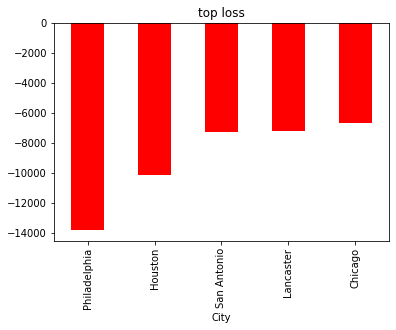

In [25]:
stores.groupby('City')['Profit'].sum().nsmallest().plot.bar(color='red', title='top loss')

#### Maximum sales in each city

In [100]:
Max_sale=[agg.loc[c].diff().max() for c in City]
print('Total Sales across all the regions\n $', sum(np.cumsum(Max_sale)))
print('Top City sales \n $', np.max(Max_sale))
list(zip(City, Max_sale))

# df=pd.DataFrame([City, Max_sale]).T
# df.columns=['City', 'Max_Sales']
# df
# df.sort_values(by='Max_Sales',ascending=False)

for c,m in zip(City, Max_sale):
    print('City {} has maximum sales is ${}'.format(c,m))

Total Sales across all the regions
 $ 85713391.84619996
Top City sales 
 $ 61985.58369999999
City Aberdeen has maximum sales is $6.63
City Abilene has maximum sales is $0.6080000000000001
City Akron has maximum sales is $-57.5
City Albuquerque has maximum sales is $633.2881
City Alexandria has maximum sales is $318.6183
City Allen has maximum sales is $-11.5
City Allentown has maximum sales is $-18.1
City Altoona has maximum sales is $-2.0835
City Amarillo has maximum sales is $-29.28
City Anaheim has maximum sales is $1231.8036
City Andover has maximum sales is $124.1886
City Ann Arbor has maximum sales is $228.81580000000002
City Antioch has maximum sales is $9.3312
City Apopka has maximum sales is $51.4634
City Apple Valley has maximum sales is $292.039
City Appleton has maximum sales is $554.7663
City Arlington has maximum sales is $4158.9969
City Arlington Heights has maximum sales is $1.0348
City Arvada has maximum sales is $59.055600000000005
City Asheville has maximum sales is 

## 2.4 Statewise Sales, Profit, Discounts 

In [27]:
agg_state=stores.groupby('State').sum()

In [28]:
State=list(agg_state.index)

### Maximum sales in each state

In [29]:
Max_sale=[agg_state['Sales'].loc[s] for s in State]
print('Total Sales across all the regions $',sum(np.cumsum(Max_sale)))
print('Top Sales State $',np.max(Max_sale))
list(zip(State, Max_sale))

df=pd.DataFrame([State, Max_sale]).T
df.columns=['State', 'Max_Sales']
df
df.sort_values(by='Max_Sales',ascending=False).head()

Total Sales across all the regions $ 60848271.90140002
Top Sales State $ 457687.631500001


State Max_Sales
3             California    457688
30              New York    310876
41                 Texas    170188
45            Washington    138641
36          Pennsylvania    116512
8                Florida   89473.7
11              Illinois   80166.1
33                  Ohio   78258.1
20              Michigan   76269.6
44              Virginia   70636.7
31        North Carolina   55603.2
12               Indiana   53555.4
9                Georgia   49095.8
15              Kentucky   36591.7
28            New Jersey   35764.3
1                Arizona     35282
47             Wisconsin   32114.6
4               Colorado   32108.1
40             Tennessee   30661.9
21             Minnesota   29863.1
19         Massachusetts   28634.4
6               Delaware   27451.1
18              Maryland   23705.5
37          Rhode Island     22628
23              Missouri   22205.1
34              Oklahoma   19683.4
0                Alabama   19510.6
35                Oregon   17431.1
26                Nevada   16729.1
5            Connecticut   13384.4
2               Arkansas   11678.1
42                  Utah   11220.1
22           Mississippi   10771.3
16             Louisiana   9217.03
43               Vermont   8929.37
38        South Carolina   8481.71
25              Nebraska   7464.93
27         New Hampshire   7292.52
24               Montana   5589.35
29            New Mexico   4783.52
13                  Iowa   4579.76
10                 Idaho   4382.49
14                Kansas   2914.31
7   District of Columbia   2865.02
48               Wyoming   1603.14
39          South Dakota   1315.56
17                 Maine   1270.53
46         West Virginia   1209.82
32          North Dakota    919.91

### Maximum profit in each State

In [30]:
Max_Profit=[agg_state['Profit'].loc[s] for s in State]
print('Total Profit across all the regions $', sum(np.cumsum(Max_Profit)))
print('Top State Profit $', np.max(Max_Profit))
list(zip(State, Max_Profit))

df=pd.DataFrame([State, Max_Profit]).T
df.columns=['State', 'Max_Profit']
df
df.sort_values(by='Max_Profit',ascending=False).head()

Total Profit across all the regions $ 8553250.38230001
Top State Profit $ 76381.38710000017


State Max_Profit
3   California    76381.4
30    New York    74038.5
45  Washington    33402.7
20    Michigan    24463.2
44    Virginia      18598

### Statewise , top 5
####  California seems highest profit  among all the states

In [31]:
stores.groupby('State')['Profit'].sum().nlargest()

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

### using pivot table

In [32]:
pd.pivot_table(stores, 'Profit', 'State', aggfunc='sum').nlargest(5, 'Profit')

Profit
State                 
California  76381.3871
New York    74038.5486
Washington  33402.6517
Michigan    24463.1876
Virginia    18597.9504

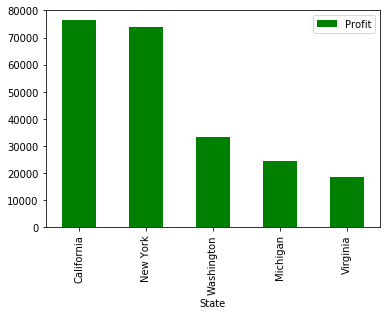

In [33]:
pd.pivot_table(stores, 'Profit', 'State', aggfunc='sum').nlargest(5, 'Profit').plot.bar(color='g') 

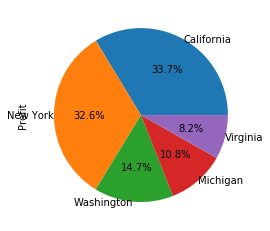

In [34]:
pd.pivot_table(stores, 'Profit', 'State', aggfunc='sum').nlargest(5, 'Profit').plot.pie(y='Profit',
                                                                                     labeldistance=1, 
                                                                                     autopct='%0.1f%%',
                                                                                     legend=False) 

### top lowest sale states

In [35]:
pd.pivot_table(stores, 'Sales', 'State', aggfunc='sum').nsmallest(5, 'Sales')

Sales
State                  
North Dakota    919.910
West Virginia  1209.824
Maine          1270.530
South Dakota   1315.560
Wyoming        1603.136

Text(0.5, 1.0, 'Top lowest sales State')

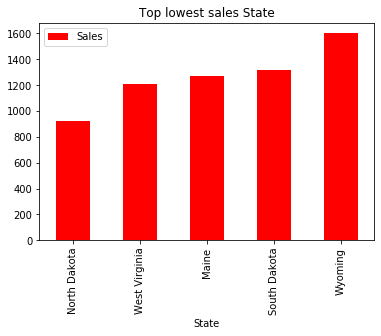

In [36]:
pd.pivot_table(stores, 'Sales', 'State', aggfunc='sum').nsmallest(5, 'Sales').plot.bar(color='r')
plt.title('Top lowest sales State')

### top lowest profit States

In [37]:
pd.pivot_table(stores, 'Profit', 'State', aggfunc='sum').nsmallest(5, 'Profit')

Profit
State                     
Texas          -25729.3563
Ohio           -16971.3766
Pennsylvania   -15559.9603
Illinois       -12607.8870
North Carolina  -7490.9122

#### Texas have huge loss 

Text(0.5, 1.0, ' Top lowest profit States \n')

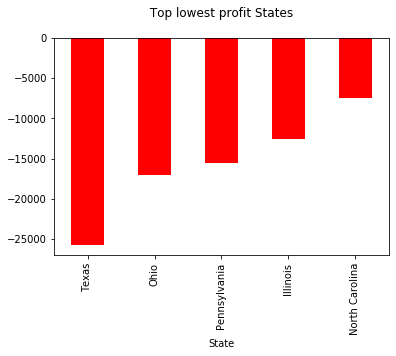

In [38]:
stores.groupby('State')['Profit'].sum().nsmallest().plot.bar(color='r')
plt.title(' Top lowest profit States \n')

## 2.5 Regionwise sales and discount 

#### 1. more sales in western region
#### 2. Quantities sold more in west
#### 3. more discount given in Central
#### 4. profits (high to low) - West, South, Central, East

In [39]:
stores.groupby('Region').sum()

Postal Code        Sales  Quantity  Discount       Profit
Region                                                            
Central    151786150  501239.8908      8780    558.34   39706.3625
East        50171698  678781.2400     10618    414.00   91522.7800
South       55875052  391721.9050      6209    238.55   46749.4303
West       293739752  725457.8245     12266    350.20  108418.4489

In [40]:
pd.pivot_table(stores, values='Sales', index='Region', columns='Ship Mode', aggfunc='sum')

Ship Mode  First Class   Same Day  Second Class  Standard Class
Region                                                         
Central     58746.9154  20415.410   103550.0054     318527.5600
East       113587.0530  43326.832   116545.5240     405321.8310
South       49332.5660  21017.173    93758.6125     227613.5535
West       129761.8885  43603.710   145339.4275     406752.7985

D:\AI\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



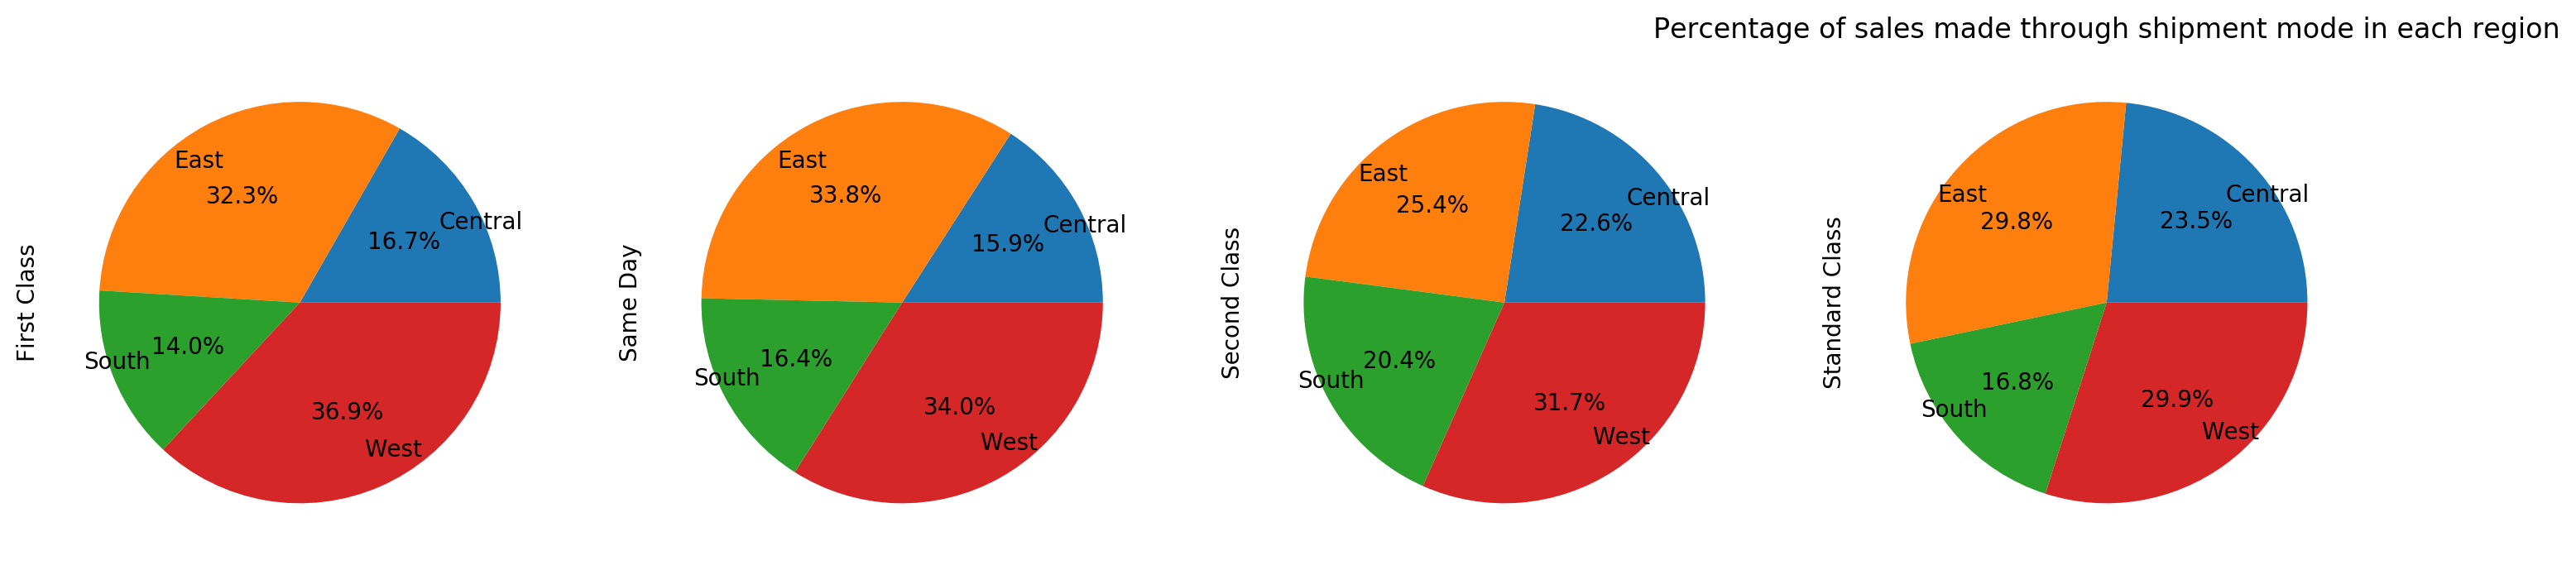

In [41]:
fig=plt.figure(figsize=(18,16), dpi=200)
ax=fig.subplots()
pd.pivot_table(stores, values='Sales', index='Region', columns='Ship Mode', aggfunc='sum').plot.pie(
    ax=ax,subplots=True, autopct='%0.1f%%', legend=False, labeldistance=0.8)
plt.title('Percentage of sales made through shipment mode in each region')
plt.show()

### bar plot

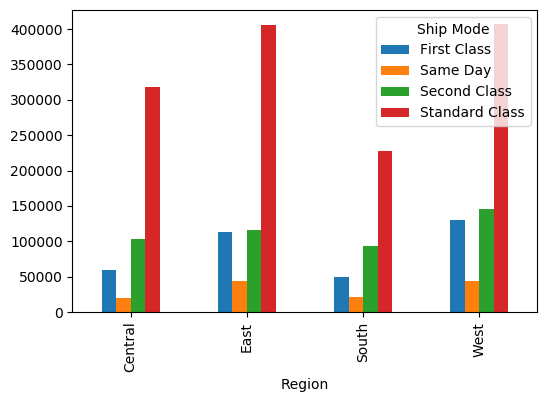

In [42]:
fig=plt.figure(figsize=(6,4), dpi=100)
ax=fig.subplots()
pd.pivot_table(stores, values='Sales', index='Region', columns='Ship Mode', aggfunc='sum').plot.bar(ax=ax)

### 2.6 profits obtained in each sub_category products

In [43]:
pd.pivot_table(data=stores,index=['Category'], columns=['Sub-Category'], values=['Profit'], aggfunc='sum', fill_value='0')

Profit                                                  \
Sub-Category    Accessories Appliances      Art  Binders Bookcases   Chairs   
Category                                                                      
Furniture                 0          0        0        0  -3472.56  26590.2   
Office Supplies           0      18138  6527.79  30221.8         0        0   
Technology          41936.6          0        0        0         0        0   

                                                                            \
Sub-Category     Copiers Envelopes Fasteners Furnishings   Labels Machines   
Category                                                                     
Furniture              0         0         0     13059.1        0        0   
Office Supplies        0   6964.18   949.518           0  5546.25        0   
Technology       55617.8         0         0           0        0  3384.76   

                                                              
Sub-Category       Paper   Phones  Storage Supplies   Tables  
Category                                                      
Furniture              0        0        0        0 -17725.5  
Office Supplies  34053.6        0  21278.8  -1189.1        0  
Technology             0  44515.7        0        0        0

### profit through ship mode

In [44]:
stores.groupby('Ship Mode').sum().nlargest(5, 'Profit')

Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
Standard Class    327908460  1.358216e+06     22797    955.02  164088.7875
Second Class      108192588  4.591936e+05      7423    270.15   57446.6354
First Class        84229511  3.514284e+05      5693    253.17   48969.8399
Same Day           31242093  1.283631e+05      1960     82.75   15891.7589

D:\AI\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

D:\AI\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



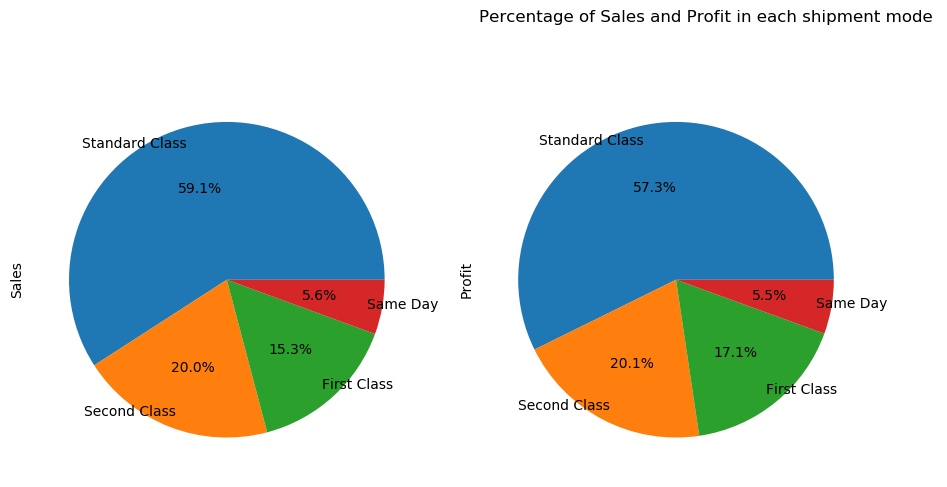

In [45]:
fig=plt.figure(figsize=(10,6), dpi=100)
ax=fig.subplots()
stores.groupby('Ship Mode')['Sales', 'Profit'].sum().nlargest(5, columns=['Sales', 'Profit']).plot.pie(ax=ax,
    subplots=True, legend=False,  autopct='%0.1f%%', labeldistance=0.9)
plt.title('Percentage of Sales and Profit in each shipment mode \n\n\n', loc='left')
plt.tight_layout()
plt.show()

### total sales, Sub-categorywise

In [46]:
pd.pivot_table(data=stores, values='Sales', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0)

Sub-Category     Accessories  Appliances        Art     Binders    Bookcases  \
Category                                                                       
Furniture              0.000       0.000      0.000       0.000  114879.9963   
Office Supplies        0.000  107532.161  27118.792  203412.733       0.0000   
Technology        167380.318       0.000      0.000       0.000       0.0000   

Sub-Category         Chairs    Copiers  Envelopes  Fasteners  Furnishings  \
Category                                                                    
Furniture        328449.103       0.00      0.000       0.00    91705.164   
Office Supplies       0.000       0.00  16476.402    3024.28        0.000   
Technology            0.000  149528.03      0.000       0.00        0.000   

Sub-Category        Labels    Machines      Paper      Phones     Storage  \
Category                                                                    
Furniture            0.000       0.000      0.000       0.000       0.000   
Office Supplies  12486.312       0.000  78479.206       0.000  223843.608   
Technology           0.000  189238.631      0.000  330007.054       0.000   

Sub-Category      Supplies      Tables  
Category                                
Furniture            0.000  206965.532  
Office Supplies  46673.538       0.000  
Technology           0.000       0.000

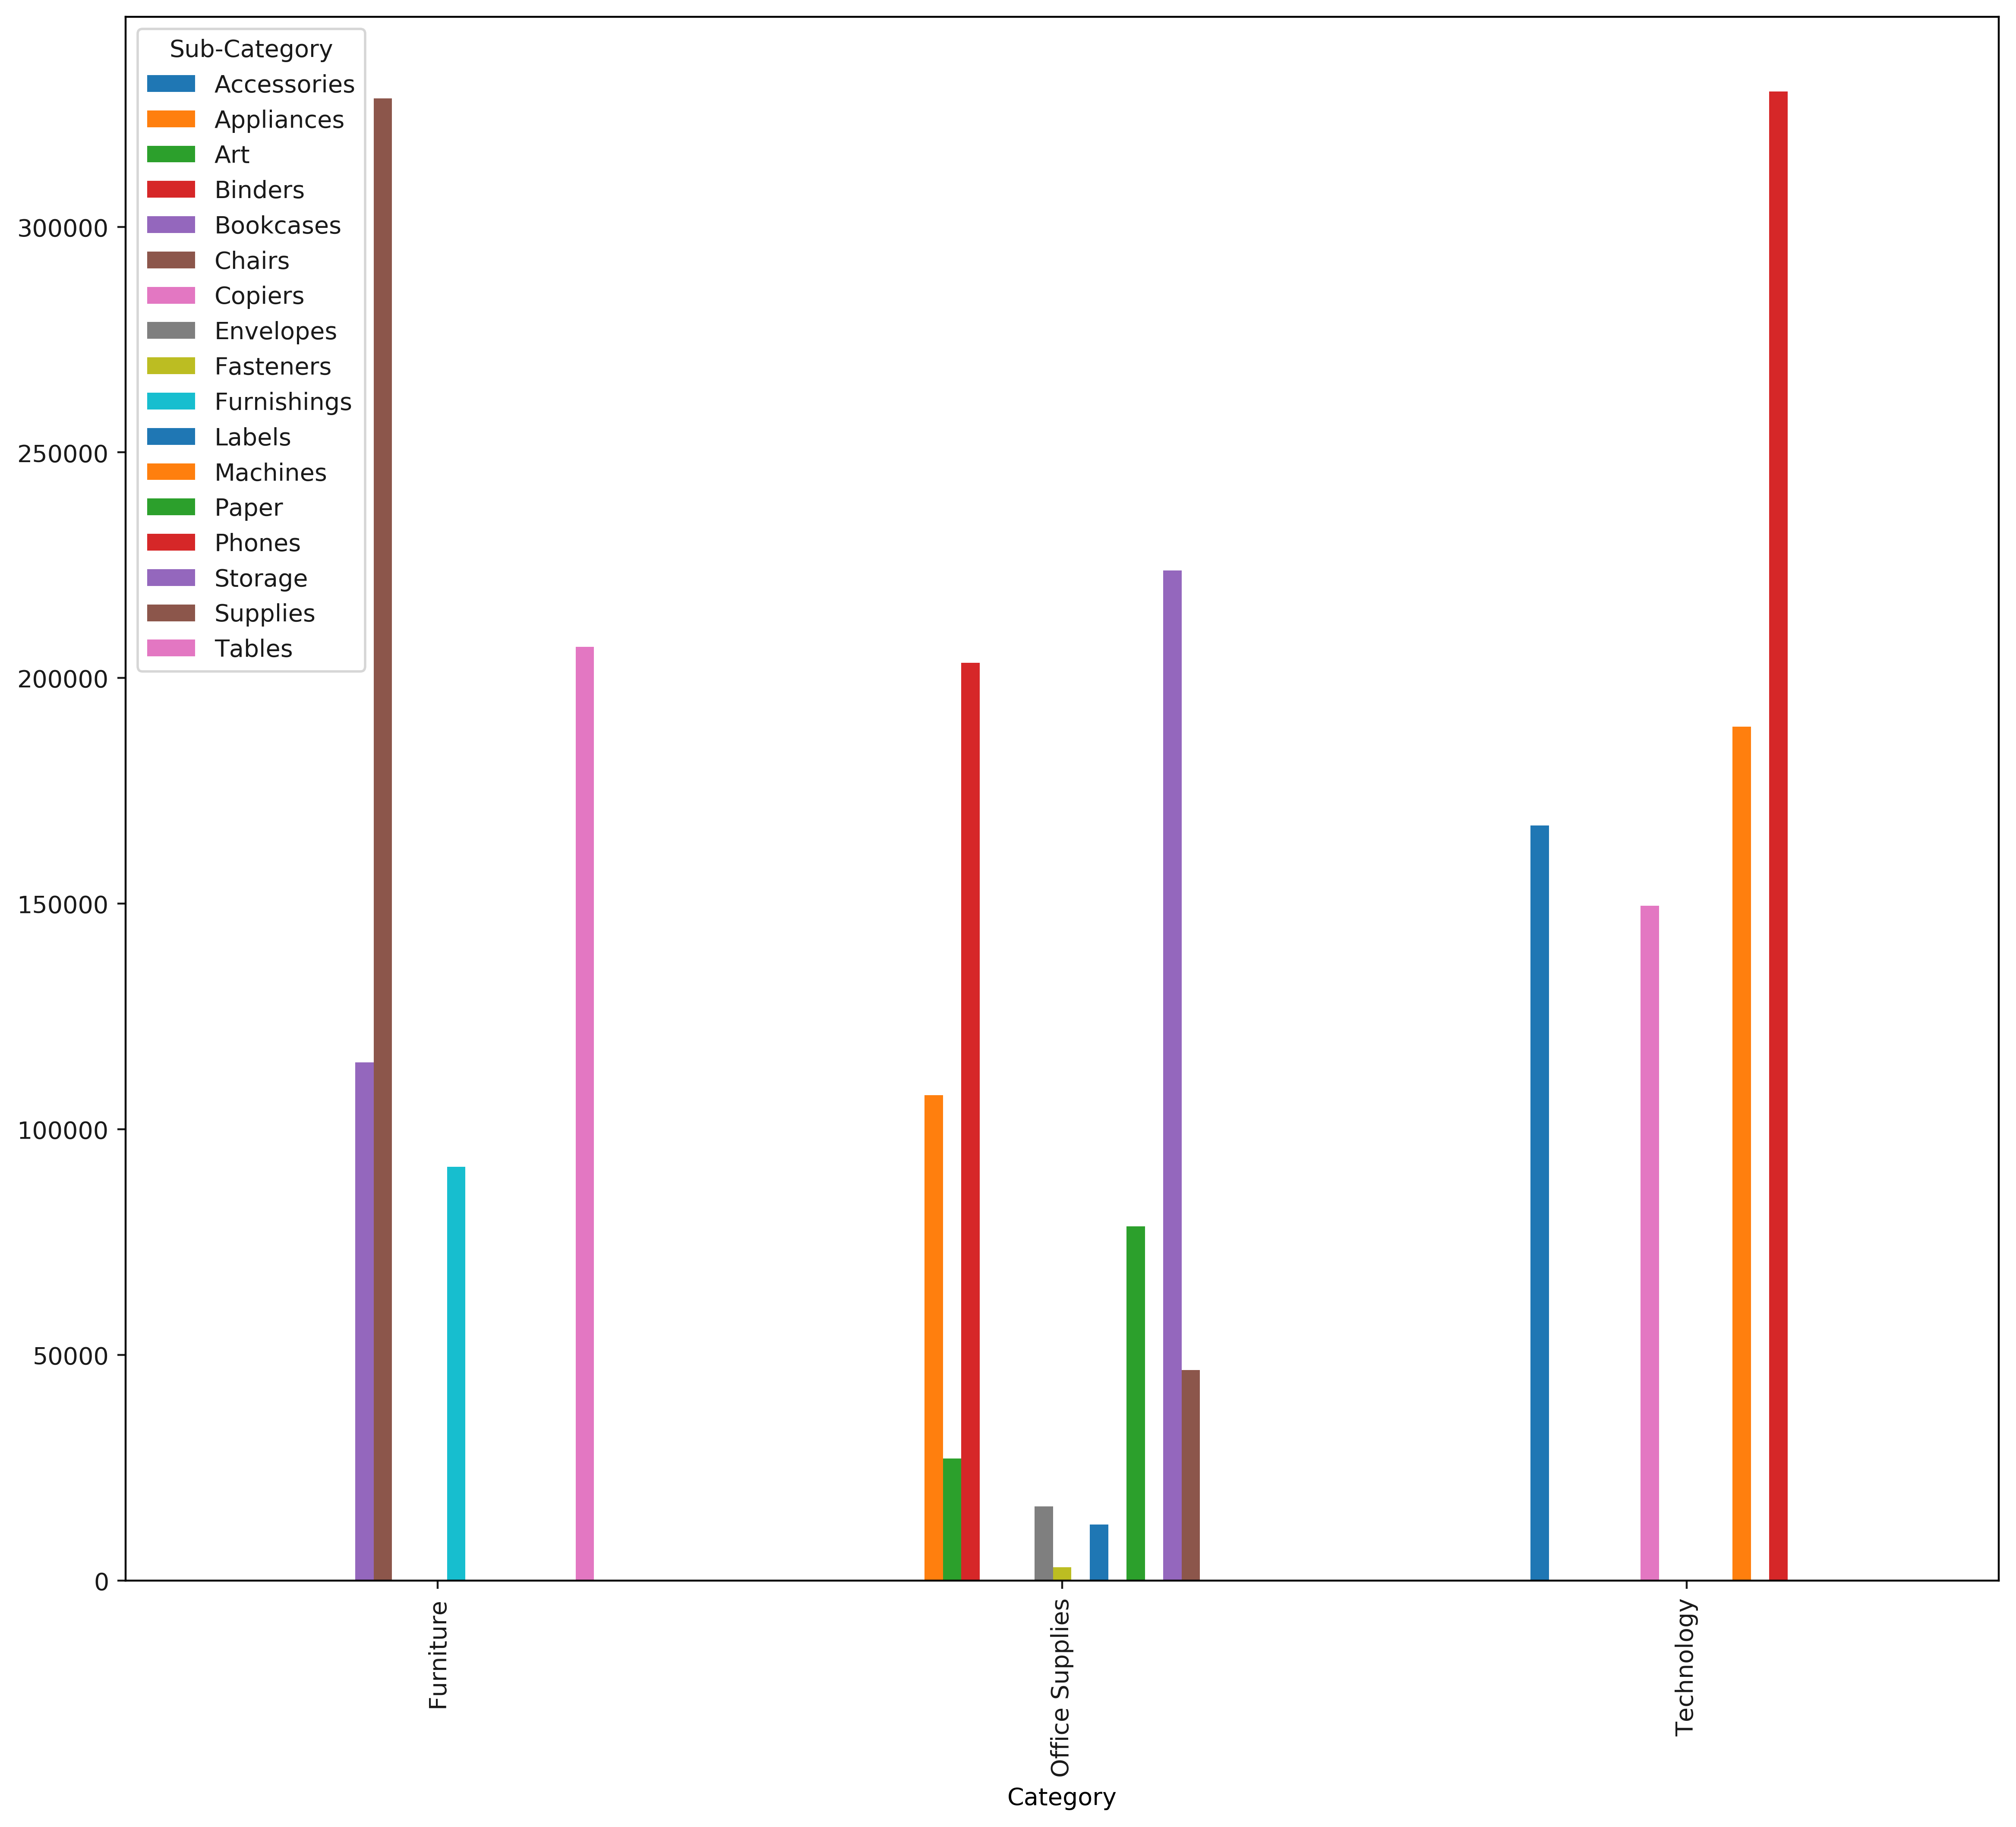

In [123]:
fig=plt.figure(figsize=(14,12), dpi=400)
ax=fig.add_subplot()
pd.pivot_table(data=stores, values='Sales', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0).plot.bar(ax=ax)

### profits in each sub-category

In [48]:
pd.pivot_table(data=stores, values='Profit', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0)

Sub-Category     Accessories  Appliances       Art     Binders  Bookcases  \
Category                                                                    
Furniture             0.0000      0.0000     0.000      0.0000  -3472.556   
Office Supplies       0.0000  18138.0054  6527.787  30221.7633      0.000   
Technology        41936.6357      0.0000     0.000      0.0000      0.000   

Sub-Category         Chairs     Copiers  Envelopes  Fasteners  Furnishings  \
Category                                                                     
Furniture        26590.1663      0.0000     0.0000     0.0000   13059.1436   
Office Supplies      0.0000      0.0000  6964.1767   949.5182       0.0000   
Technology           0.0000  55617.8249     0.0000     0.0000       0.0000   

Sub-Category       Labels   Machines       Paper      Phones     Storage  \
Category                                                                   
Furniture           0.000     0.0000      0.0000      0.0000      0.0000   
Office Supplies  5546.254     0.0000  34053.5693      0.0000  21278.8264   
Technology          0.000  3384.7569      0.0000  44515.7306      0.0000   

Sub-Category      Supplies      Tables  
Category                                
Furniture           0.0000 -17725.4811  
Office Supplies -1189.0995      0.0000  
Technology          0.0000      0.0000

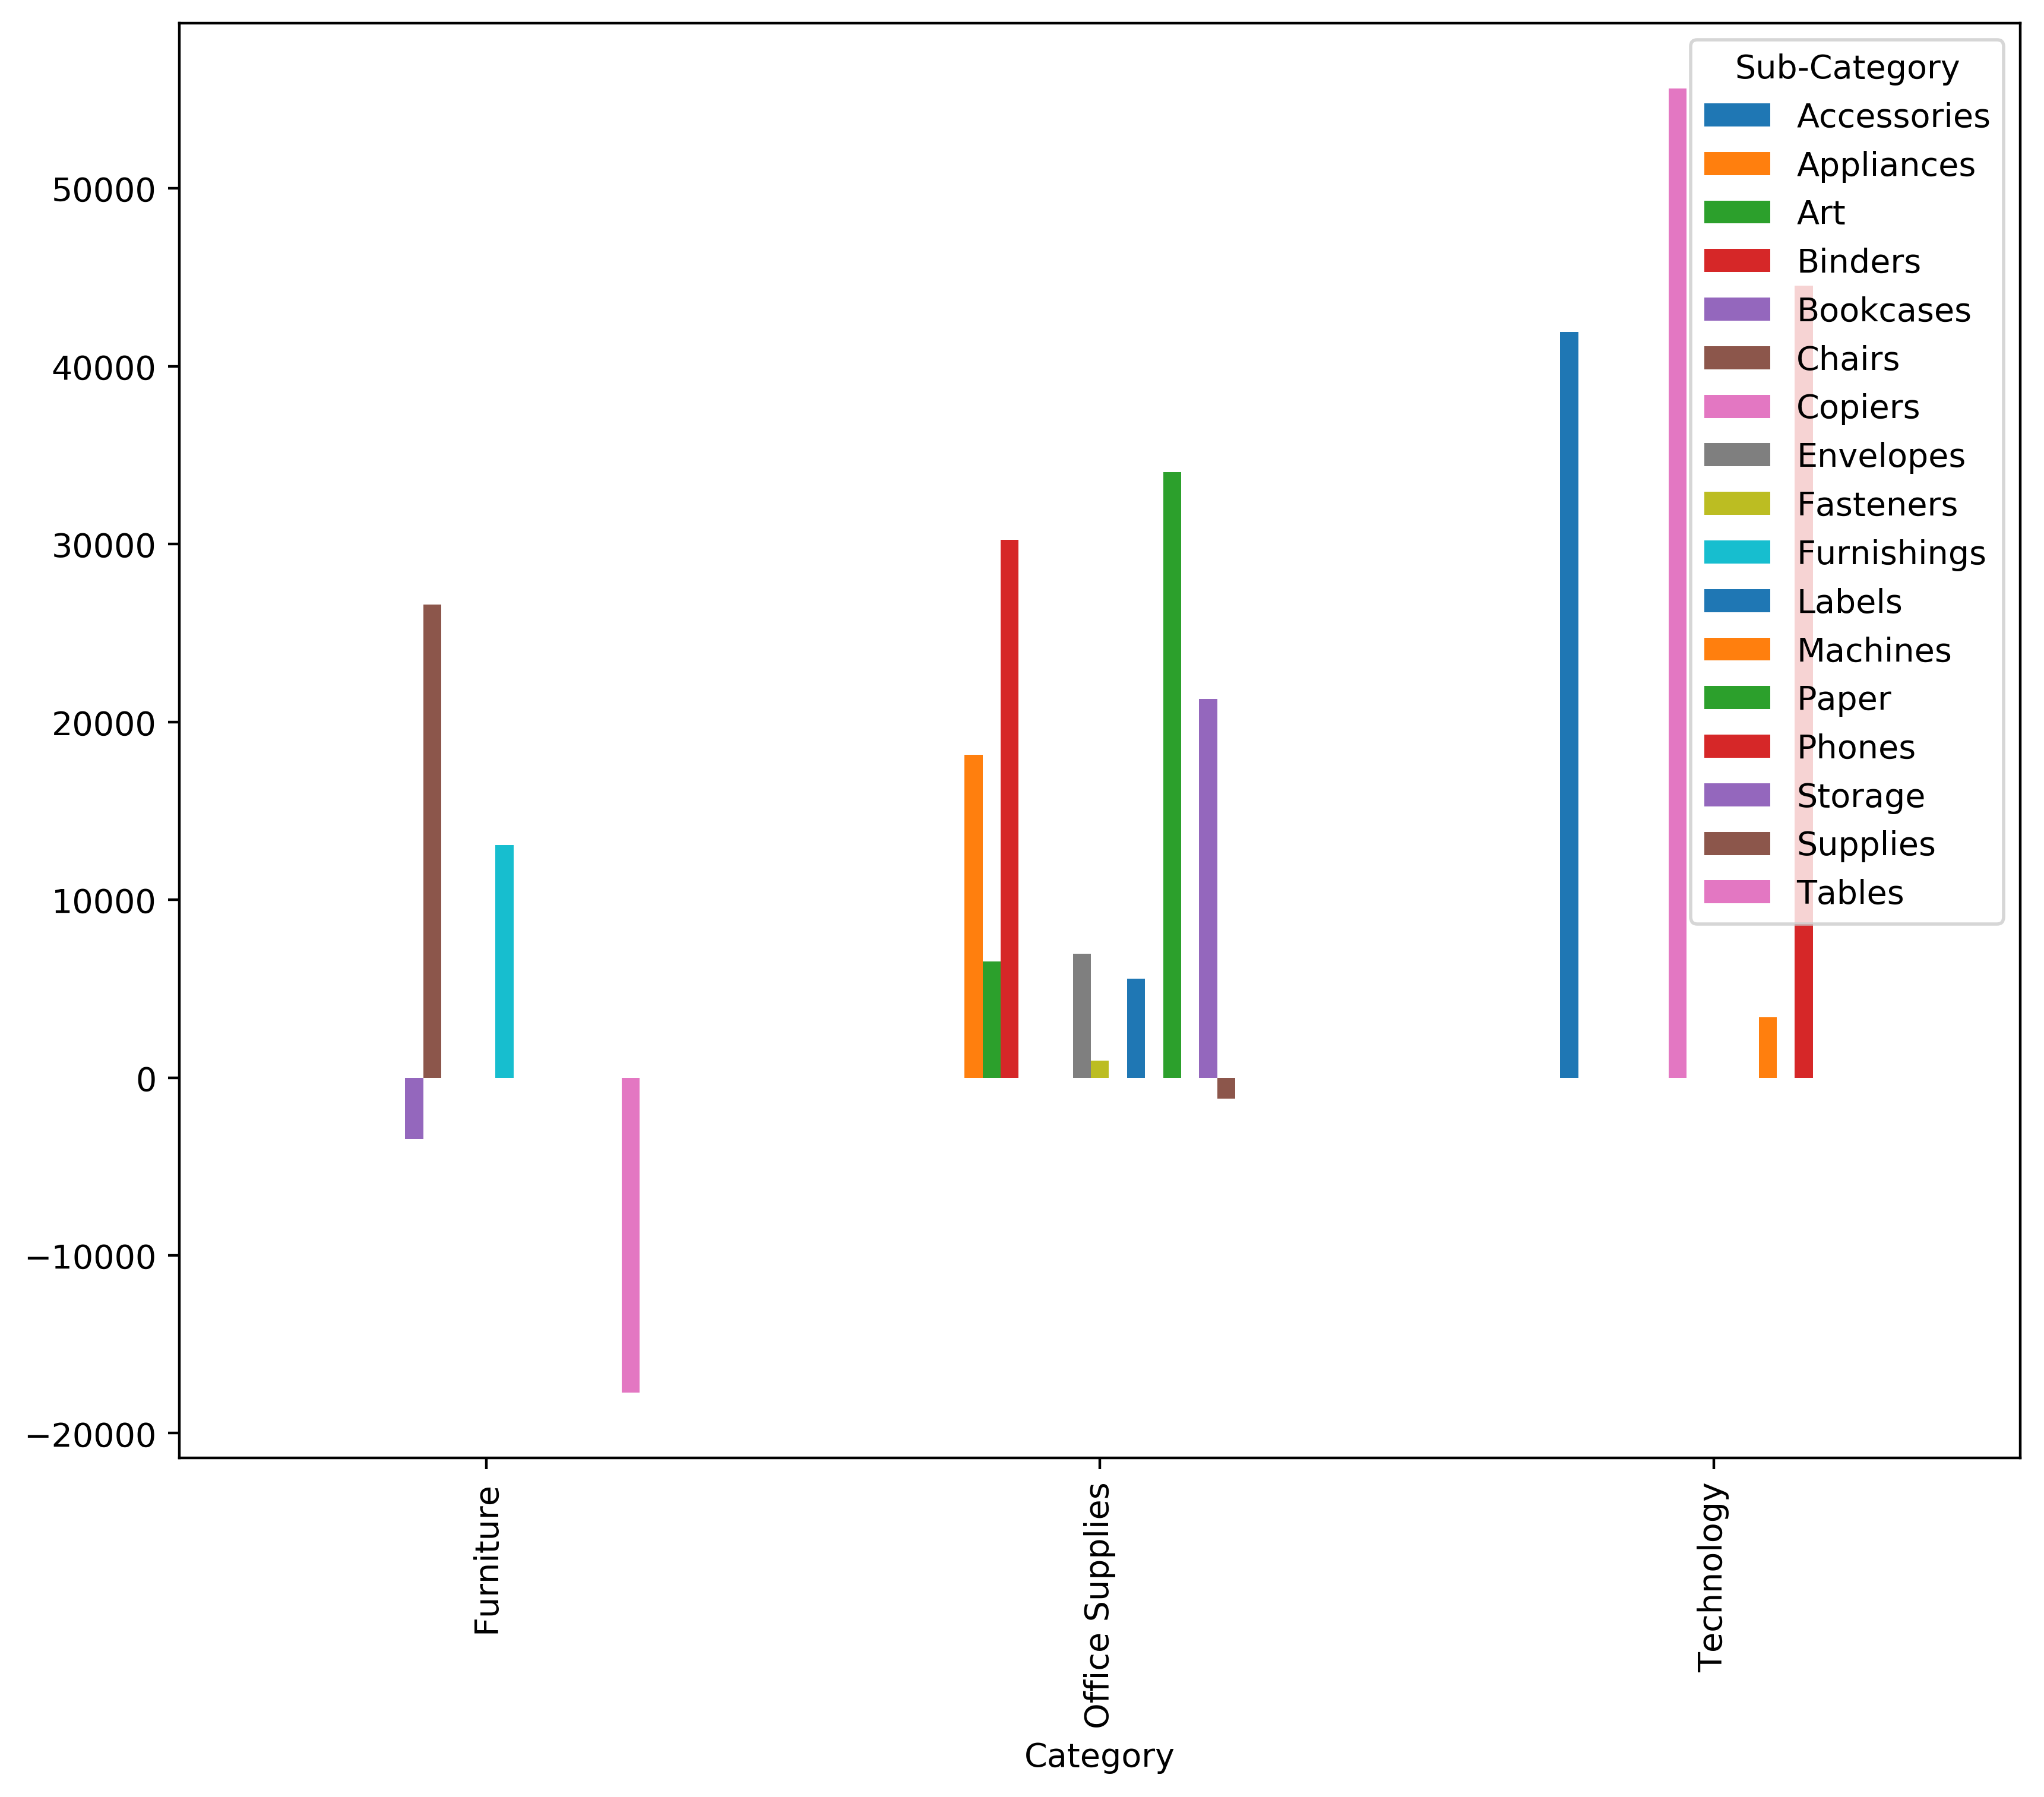

In [49]:
fig=plt.figure(figsize=(10,8), dpi=400)
ax=fig.add_subplot()
pd.pivot_table(data=stores, values='Profit', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0).plot.bar(ax=ax)

## 3.Discounts

### Citywise maximum discount

In [91]:
stores.groupby('City').sum().sort_values('Discount', ascending=False).head()

Postal Code        Sales  Quantity  Discount      Profit
City                                                                  
Philadelphia     10275302  109077.0130      1981    175.50 -13837.7674
Houston          29052387   64504.7604      1466    143.14 -10153.5485
Chicago          19037248   48539.5410      1132    120.50  -6654.5688
Dallas           11802703   20131.9322       555     56.30  -2846.5257
Los Angeles      67252887  175851.3410      2879     55.50  30440.7579

### Discounts- 0.6, 0.7, 0.8 are high discounts

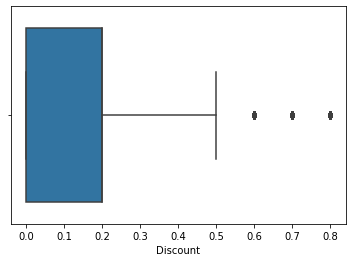

In [51]:
sns.boxplot(stores['Discount'])

### 3.2 Maximum discounts(>0.5) given for low profit and sales area

In [92]:
Huge_Discounts=stores.loc[stores['Discount']>0.5]
Huge_Discounts.groupby('City').sum().sort_values('Discount', ascending=False).head()

Postal Code     Sales  Quantity  Discount      Profit
City                                                               
Houston           8785222  6377.620       419      84.4 -10486.7711
Chicago           6002285  5396.988       353      72.2  -8266.2406
Philadelphia      1798666  6685.878       304      65.8  -5604.4796
Dallas            3232478  2068.996       182      31.8  -2780.4929
Columbus           864580   399.147        87      14.0   -295.7770

### low discounts upto 0.5

In [93]:
low_Discounts=stores.loc[stores['Discount']<=0.5]
low_Discounts.groupby('City').sum().sort_values('Discount', ascending=False).head()

Postal Code        Sales  Quantity  Discount      Profit
City                                                                   
Philadelphia       8476636  102391.1350      1677    109.70  -8233.2878
Houston           20267165   58127.1404      1047     58.74    333.2226
Los Angeles       67252887  175851.3410      2879     55.50  30440.7579
New York City      9168909  256368.1610      3417     51.40  62036.9837
Chicago           13034963   43142.5530       779     48.30   1611.6718

In [95]:
stores.groupby(['Postal Code', 'City']).sum().head()

Sales  Quantity  Discount     Profit
Postal Code City                                                
1040        Holyoke       301.960         2       0.0    60.3920
1453        Leominster    217.490        20       0.0    79.5016
1752        Marlborough   206.640         6       0.0    67.6068
1810        Andover       435.850        13       0.0   124.1886
1841        Lawrence     6109.062       114       0.6  1849.4035

## 4. Counts
### Standard class have maximum deliveries

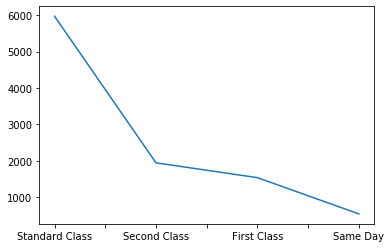

In [56]:
stores['Ship Mode'].value_counts().plot()

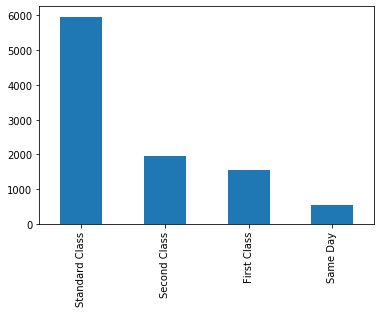

In [57]:
stores['Ship Mode'].value_counts().plot.bar()

### maximum purchasing history in consumer segment

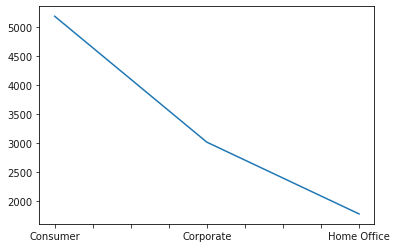

In [103]:
stores.Segment.value_counts().plot()

In [104]:
len(stores.State.value_counts())
print('total number of states is ',len(stores.State.value_counts()))

total number of states is  49


In [105]:
len(stores['Postal Code'].value_counts())
print('total number of postal code is ',len(stores['Postal Code'].value_counts()))

total number of postal code is  631


### 4.1 West region has more shop outlets 

In [106]:
stores['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

### 4.2 Office Supplies category has sold more

In [107]:
stores['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### In sub-category, Binders, papers are the   top  purchasing items

In [108]:
stores['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### 4.3    Quantity 2 and 3  seen higher purchase

In [109]:
stores['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

### 4.4 total number of items sold in each sub-category

In [110]:
pd.pivot_table(data=stores,index=['Category'],
               columns=['Sub-Category'], values=['Quantity'], 
               aggfunc='sum', fill_value='0')

Quantity                                                    \
Sub-Category    Accessories Appliances   Art Binders Bookcases Chairs Copiers   
Category                                                                        
Furniture                 0          0     0       0       868   2356       0   
Office Supplies           0       1729  3000    5974         0      0       0   
Technology             2976          0     0       0         0      0     234   

                                                                              \
Sub-Category    Envelopes Fasteners Furnishings Labels Machines Paper Phones   
Category                                                                       
Furniture               0         0        3563      0        0     0      0   
Office Supplies       906       914           0   1400        0  5178      0   
Technology              0         0           0      0      440     0   3289   

                                         
Sub-Category    Storage Supplies Tables  
Category                                 
Furniture             0        0   1241  
Office Supplies    3158      647      0  
Technology            0        0      0

### 4.5 number of items sold in subcategories of each category

In [111]:
pd.crosstab(stores['Category'], stores['Sub-Category']).T

Category      Furniture  Office Supplies  Technology
Sub-Category                                        
Accessories           0                0         775
Appliances            0              466           0
Art                   0              796           0
Binders               0             1523           0
Bookcases           228                0           0
Chairs              617                0           0
Copiers               0                0          68
Envelopes             0              254           0
Fasteners             0              217           0
Furnishings         957                0           0
Labels                0              364           0
Machines              0                0         115
Paper                 0             1370           0
Phones                0                0         889
Storage               0              846           0
Supplies              0              190           0
Tables              319                0           0

D:\AI\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



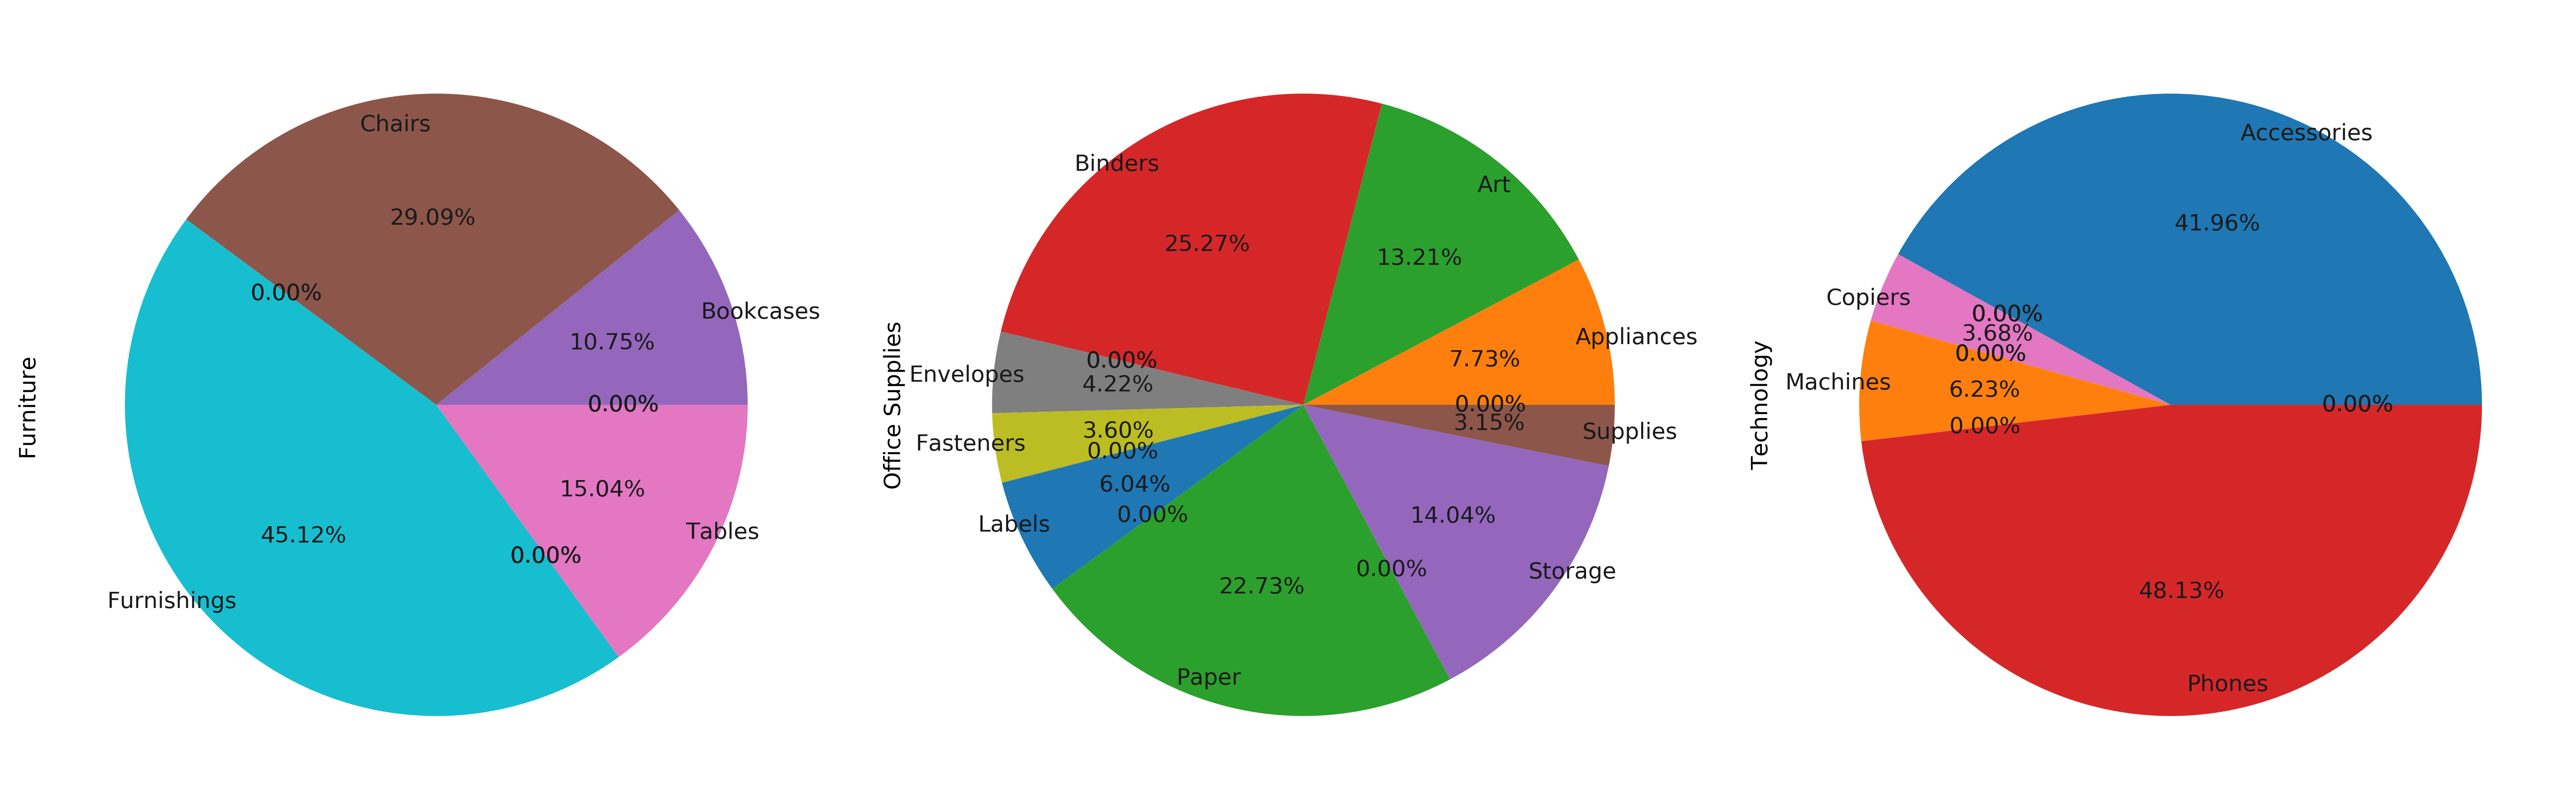

In [125]:
fig=plt.figure(figsize=(16,14), dpi=400)
ax=fig.add_subplot()
pd.crosstab(stores['Category'], stores['Sub-Category']).T.plot.pie(subplots=True, ax=ax, 
                                                                   legend=False, labeldistance=0.9, 
                                                                   frame=False, #rotatelabels=True,
                                                                  shadow=False, autopct='%0.2f%%')
plt.tight_layout()
plt.show()

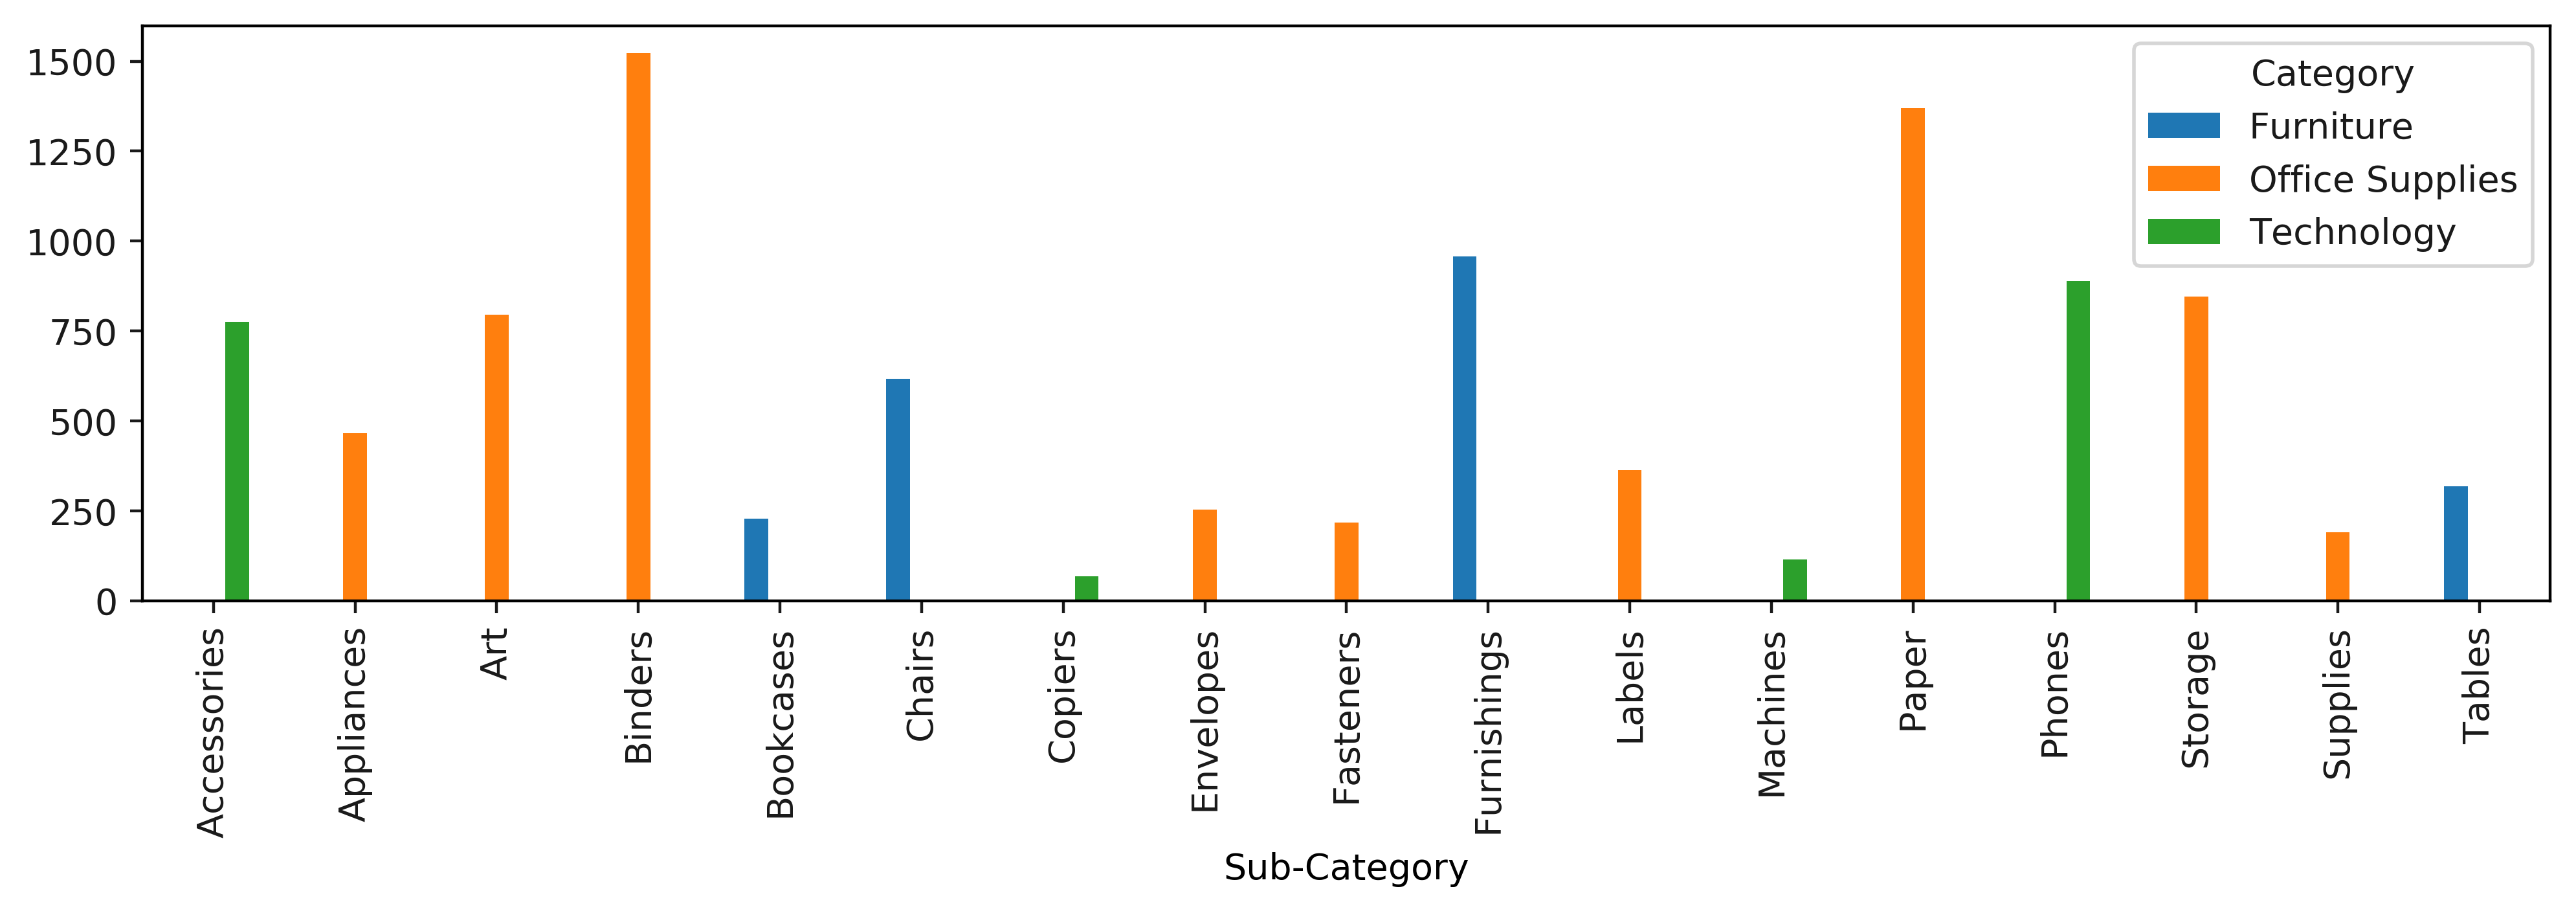

In [126]:
fig=plt.figure(figsize=(12,10), dpi=400)
ax=fig.add_subplot(3,1,1)
pd.crosstab(stores['Category'], stores['Sub-Category']).T.plot.bar(ax=ax)

### 4.6 Regionwise counts in each segment

In [ ]:
pd.crosstab(stores['Region'], stores['Segment'])


#### Citywise segment count

In [127]:
pd.crosstab(stores['City'], stores['Segment']).sort_values(by='Consumer', ascending=False)

Segment        Consumer  Corporate  Home Office
City                                           
New York City       504        266          145
Los Angeles         382        237          128
Philadelphia        269        177           91
San Francisco       260        158           92
Seattle             219        119           90
...                 ...        ...          ...
Sanford               0          0            2
Helena                0          1            2
Hesperia              0          4            0
San Marcos            0          4            0
Yuma                  0          2            2

[531 rows x 3 columns]

### 4.7 sub-categorywise, total items sold

In [128]:
pd.pivot_table(data=stores, values='Sales',index='Category', columns='Sub-Category', aggfunc='count', fill_value=0)

Sub-Category     Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
Category                                                                    
Furniture                  0           0    0        0        228     617   
Office Supplies            0         466  796     1523          0       0   
Technology               775           0    0        0          0       0   

Sub-Category     Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Category                                                                        
Furniture              0          0          0          957       0         0   
Office Supplies        0        254        217            0     364         0   
Technology            68          0          0            0       0       115   

Sub-Category     Paper  Phones  Storage  Supplies  Tables  
Category                                                   
Furniture            0       0        0         0     319  
Office Supplies   1370       0      846       190       0  
Technology           0     889        0         0       0

In [129]:
pd.crosstab(stores['Quantity'], stores['Sub-Category'])

Sub-Category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
Quantity                                                                 
1                      66          39   70      126         22      54   
2                     179         122  187      348         58     149   
3                     196         102  204      355         49     149   
4                      97          65   86      179         25      73   
5                      92          57  100      201         31      75   
6                      41          29   41      102         12      39   
7                      47          27   57       99         14      31   
8                      17          12   19       44          5      18   
9                      22           7   24       37          7      18   
10                      7           1    5       10          3       3   
11                      3           1    1        6          0       2   
12                      3           1    1        3          1       1   
13                      2           2    0        8          1       1   
14                      3           1    1        5          0       4   

Sub-Category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Quantity                                                                     
1                   7         25         13           78      34         7   
2                  21         69         44          231      96        28   
3                  10         67         47          255      76        31   
4                  10         21         29          117      43        17   
5                  13         28         33          115      40         9   
6                   2         13         16           53      20         7   
7                   3         17         18           45      22         8   
8                   1          5          5           27      15         4   
9                   1          9          6           21      10         1   
10                  0          0          0            3       4         1   
11                  0          0          1            6       1         2   
12                  0          0          2            1       1         0   
13                  0          0          2            1       1         0   
14                  0          0          1            4       1         0   

Sub-Category  Paper  Phones  Storage  Supplies  Tables  
Quantity                                                
1               125      89       90        15      39  
2               340     210      190        65      65  
3               318     224      206        39      81  
4               168     107      103        19      32  
5               160     111      105        28      32  
6                81      38       55         6      17  
7                80      55       44        14      25  
8                37      23       15         2       8  
9                40      18       24         1      12  
10                7       4        5         1       3  
11                5       2        4         0       0  
12                1       3        2         0       3  
13                4       2        1         0       2  
14                4       3        2         0       0

In [130]:
pd.crosstab(index=stores['Quantity'], columns=stores['Category'])

Category  Furniture  Office Supplies  Technology
Quantity                                        
1               193              537         169
2               503             1461         438
3               534             1414         461
4               247              713         231
5               253              752         225
6               121              363          88
7               115              378         113
8                58              154          45
9                58              158          42
10               12               33          12
11                8               19           7
12                6               11           6
13                5               18           4
14                8               15           6

In [131]:
np.cumsum(pd.crosstab(index=stores['Quantity'], 
                      columns=stores['Category'],
                      values=stores['Sub-Category'],
                      aggfunc='count'))

Category  Furniture  Office Supplies  Technology
Quantity                                        
1               193              537         169
2               696             1998         607
3              1230             3412        1068
4              1477             4125        1299
5              1730             4877        1524
6              1851             5240        1612
7              1966             5618        1725
8              2024             5772        1770
9              2082             5930        1812
10             2094             5963        1824
11             2102             5982        1831
12             2108             5993        1837
13             2113             6011        1841
14             2121             6026        1847

In [132]:
px.scatter(stores,'Sales', 'Profit', orientation='v', range_x=(0,1000), range_y=(-500, 500))

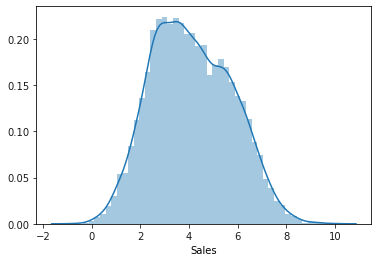

In [133]:
sns.distplot(np.log(stores['Sales']))

#### Box plot to see sales distribution

In [134]:
px.box(np.log(stores['Sales']+1), orientation='h')

### Sales and Profits have positive correlation

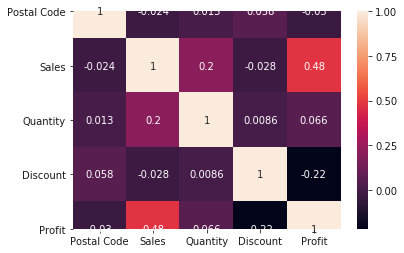

In [135]:
sns.heatmap(stores.corr(), annot=True)

### 20% Discount makes good profit
### above 20%, produce losses in all the states


## To improve sales and profits, add 20% discounts to more products and reduce higher discounts

In [136]:
pd.pivot_table(stores, index='State', columns='Discount', values='Profit', aggfunc='sum', fill_value='0', margins=True)

Discount                  0.0      0.1     0.15      0.2      0.3     0.32  \
State                                                                        
Alabama               5786.83        0        0        0        0        0   
Arizona                     0        0        0  2300.84        0        0   
Arkansas              4008.69        0        0        0        0        0   
California            44453.4        0  1418.99  30508.9        0        0   
Colorado                    0        0        0  1619.68        0        0   
Connecticut           3531.11        0        0        0 -19.6146        0   
Delaware              10063.3        0        0        0 -85.8963        0   
District of Columbia  1059.59        0        0        0        0        0   
Florida                     0        0        0  3830.55        0        0   
Georgia                 16250        0        0        0        0        0   
Idaho                 743.549        0        0   83.174        0        0   
Illinois                    0        0        0  5829.11 -1808.53        0   
Indiana               18382.9        0        0        0        0        0   
Iowa                  1183.81        0        0        0        0        0   
Kansas                836.444        0        0        0        0        0   
Kentucky              11199.7        0        0        0        0        0   
Louisiana              2196.1        0        0        0        0        0   
Maine                 454.486        0        0        0        0        0   
Maryland               7102.3        0        0        0  -71.117        0   
Massachusetts          7330.8        0        0        0 -545.295        0   
Michigan                22545  1918.17        0        0        0        0   
Minnesota             10823.2        0        0        0        0        0   
Mississippi           3172.98        0        0        0        0        0   
Missouri              6436.21        0        0        0        0        0   
Montana                1624.2        0        0  209.132        0        0   
Nebraska              2037.09        0        0        0        0        0   
Nevada                1234.49        0        0  2082.28        0        0   
New Hampshire         1811.82        0        0        0 -105.316        0   
New Jersey             9824.2        0        0        0 -51.2906        0   
New Mexico            919.499        0        0  237.617        0        0   
New York              54176.3  7111.01        0  17286.9        0        0   
North Carolina              0        0        0  3585.98        0        0   
North Dakota           230.15        0        0        0        0        0   
Ohio                        0        0        0  3255.84 -649.354        0   
Oklahoma              4853.96        0        0        0        0        0   
Oregon                      0        0        0  947.916        0        0   
Pennsylvania                0        0        0  580.137 -1993.42        0   
Rhode Island           7515.8        0        0        0 -230.168        0   
South Carolina        1769.06        0        0        0        0        0   
South Dakota          394.828        0        0        0        0        0   
Tennessee                   0        0        0  1232.05        0        0   
Texas                       0        0        0  8225.93 -4732.33 -2391.14   
Utah                  2193.85        0        0  352.686        0        0   
Vermont               2244.98        0        0        0        0        0   
Virginia                18598        0        0        0        0        0   
Washington            25334.2        0        0   8068.4        0        0   
West Virginia         262.875        0        0        0 -76.9536        0   
Wisconsin              8401.8        0        0        0        0        0   
Wyoming                     0        0        0  100.196        0        0   
All                   

In [144]:
#pd.pivot_table(stores, index='State', columns='Discount', values='Profit', aggfunc='sum', fill_value='0', margins=True)

### citywise, profits obtained for each discount level

In [138]:
pd.pivot_table(stores, index='City', columns='Discount', values='Profit', aggfunc='sum', fill_value='0', margins=True).sort_values(by='All')

Discount           0.0      0.1     0.15      0.2      0.3     0.32      0.4  \
City                                                                           
Philadelphia         0        0        0  706.037 -1963.37        0 -4407.81   
Houston              0        0        0  4032.89 -1579.56 -1120.42 -999.683   
San Antonio          0        0        0  374.526  -374.64        0 -1406.31   
Lancaster        3.597        0        0  180.267  -1.2178        0 -385.754   
Chicago              0        0        0  3808.77 -750.171        0        0   
...                ...      ...      ...      ...      ...      ...      ...   
San Francisco  10440.4        0  669.977  6396.96        0        0        0   
Seattle        21704.3        0        0  7451.79        0        0        0   
Los Angeles    17743.3        0  499.723  12197.7        0        0        0   
New York City  45043.4  6187.05        0  14349.3        0        0 -3542.72   
All             320988  9029.18  1418.99  90337.3 -10369.3 -2391.14 -23057.1   

Discount          0.45      0.5      0.6      0.7      0.8      All  
City                                                                 
Philadelphia         0 -2568.14        0 -5604.48        0 -13837.8  
Houston              0        0 -704.821        0 -9781.95 -10153.5  
San Antonio          0        0 -40.6482        0 -5851.98 -7299.05  
Lancaster            0        0        0 -7035.96        0 -7239.07  
Chicago              0 -1446.93 -1130.59        0 -7135.65 -6654.57  
...                ...      ...      ...      ...      ...      ...  
San Francisco        0        0        0        0        0  17507.4  
Seattle              0        0        0        0        0  29156.1  
Los Angeles          0        0        0        0        0  30440.8  
New York City        0        0        0        0        0    62037  
All           -2493.11 -20506.4 -5944.66 -40075.4   -30539   286397  

[532 rows x 13 columns]

In [145]:
# pd.pivot_table(stores, index='City', 
#                columns='Discount', 
#                values='Sales', 
#                aggfunc='sum', 
#                fill_value='0', margins=True).sort_values(by='All', ascending=False)

### statewise

In [140]:
pd.pivot_table(stores, 
               index='Discount', 
               columns='State',
               values='Sales', 
               aggfunc='sum',
               fill_value='0', 
               observed=True,
               margins=True).T.sort_values(by='All', ascending=False)

Discount                      0.0      0.1     0.15      0.2      0.3  \
State                                                                   
All                   1.08791e+06  54369.4  27558.5   764594   103227   
California                 171130        0  27558.5   258999        0   
New York                   178029  46634.2        0  72433.9        0   
Texas                           0        0        0    78598  42333.1   
Washington                88930.6        0        0  49710.7        0   
Pennsylvania                    0        0        0  43322.8  18724.2   
Florida                         0        0        0  55724.3        0   
Illinois                        0        0        0    42622  22602.2   
Ohio                            0        0        0  28777.4  10145.7   
Michigan                  68534.5   7735.1        0        0        0   
Virginia                  70636.7        0        0        0        0   
North Carolina                  0        0        0  30738.5        0   
Indiana                   53555.4        0        0        0        0   
Georgia                   49095.8        0        0        0        0   
Kentucky                  36591.7        0        0        0        0   
New Jersey                  35346        0        0        0  418.292   
Arizona                         0        0        0  27616.1        0   
Wisconsin                 32114.6        0        0        0        0   
Colorado                        0        0        0  25244.8        0   
Tennessee                       0        0        0    18559        0   
Minnesota                 29863.1        0        0        0        0   
Massachusetts             24668.4        0        0        0     3966   
Delaware                  26940.8        0        0        0  510.279   
Maryland                  22915.7        0        0        0  789.803   
Rhode Island              20869.7        0        0        0  1758.25   
Missouri                  22205.1        0        0        0        0   
Oklahoma                  19683.4        0        0        0        0   
Alabama                   19510.6        0        0        0        0   
Oregon                          0        0        0  14911.7        0   
Nevada                    6250.11        0        0    10479        0   
Connecticut                 13132        0        0        0  252.357   
Arkansas                  11678.1        0        0        0        0   
Utah                      9845.24        0        0  1374.82        0   
Mississippi               10771.3        0        0        0        0   
Louisiana                 9217.03        0        0        0        0   
Vermont                   8929.37        0        0        0        0   
South Carolina            8481.71        0        0        0        0   
Nebraska                  7464.93        0        0        0        0   
New Hampshire             6239.36        0        0        0  1053.16   
Montana                   4641.44        0        0  947.912        0   
New Mexico                3009.57        0        0  1773.95        0   
Iowa                      4579.76        0        0        0        0   
Idaho                     3224.95        0        0  1157.54        0   
Kansas                    2914.31        0        0        0        0   
District of Columbia      2865.02        0        0        0        0   
Wyoming                         0        0        0  1603.14        0   
South Dakota              1315.56        0        0        0        0   
Maine                     1270.53        0        0        0        0   
West Virginia              536.48        0        0        0  673.344   
North Dakota               919.91        0        0        0        0   

Discount                 0.32      0.4     0.45      0.5      0.6      0.7  \
State                                                                        
All                   14493.5   116418  5484.97

In [141]:
pd.pivot_table(stores, 
               index='Discount', 
               columns='Quantity',
               values='Sales', 
               aggfunc='sum',
               fill_value='0', 
               observed=True,
               margins=True).T.sort_values(by='All', ascending=False).T

Quantity          All        3        5        4        2        7        6  \
Discount                                                                      
0.0       1.08791e+06   195677   221026   153717   122077   132765  67643.2   
0.1           54369.4  5555.49   8383.5  3115.69  10637.7  2594.84   7838.8   
0.15          27558.5   4005.9  5634.91     1506  5199.77  1897.81   1203.4   
0.2            764594   158604   118358   110065   108064  66767.8  79061.1   
0.3            103227  21601.4  23143.1  11687.1  15360.2   7624.3  8876.15   
0.32          14493.5     2460  1264.66  3193.06  1314.96  2536.79     1228   
0.4            116418  19721.4  12045.7  20515.7  15152.2  14344.8   5067.5   
0.45          5484.97  1170.13  957.577   1316.7   233.86  893.316  721.875   
0.5           58918.5  7404.26  5078.07  10254.6  4284.63  4995.44  25467.7   
0.6            6644.7  1067.52  2676.56  516.512  767.312    375.9   547.32   
0.7           40620.3  2917.18  11989.6  5162.44  4901.36   4242.4  7510.18   
0.8           16963.8  1875.49  5103.76  2621.36  1098.98  870.198  1957.08   
All        2.2972e+06   422061   415662   323671   289091   239908   207122   

Quantity        9        8        1       13       10       11       12  \
Discount                                                                  
0.0       67587.7  54731.7  25204.3  20090.2   7970.4  7485.94   4769.4   
0.1       4595.62  2563.06  931.563        0  1448.82  5509.45        0   
0.15      917.923  3889.33  768.332  1336.83  1198.33        0        0   
0.2       36660.6  36087.7  19112.5  6433.13  10789.1  2708.55  7961.76   
0.3       8902.09  3263.06  2274.71        0   239.96        0        0   
0.32       1352.4        0  361.726        0  781.864        0        0   
0.4       5830.27    13321  2442.25  4297.64   996.24        0  2137.25   
0.45            0        0  191.516        0        0        0        0   
0.5        386.91        0  1046.87        0        0        0        0   
0.6        437.04      112  144.536        0        0        0        0   
0.7       1542.67  877.704  618.054   166.92   584.85   68.541        0   
0.8        292.41  2914.66   155.53   13.468    47.08        0        0   
All        128506   117760  53251.9  32338.2  24056.7  15772.5  14868.4   

Quantity       14  
Discount           
0.0       7164.22  
0.1       1194.86  
0.15            0  
0.2       3920.22  
0.3       254.604  
0.32            0  
0.4       545.916  
0.45            0  
0.5             0  
0.6             0  
0.7        38.388  
0.8        13.748  
All         13132

In [146]:
# pd.pivot_table(stores, 
#                index='Discount', 
#                columns='Quantity',
#                values='Profit', 
#                aggfunc='sum',
#                fill_value='0', 
#                observed=True,
#                margins=True).T.sort_values(by='All', ascending=False).T

In [143]:
pd.pivot_table(stores, 
               index='Sub-Category', 
               columns='Quantity',
               values='Profit', 
               aggfunc='sum',
               fill_value='0', 
               observed=True,
               margins=True).T.sort_values(by='All', ascending=False)

Sub-Category Accessories Appliances      Art  Binders Bookcases   Chairs  \
Quantity                                                                   
All              41936.6      18138  6527.79  30221.8  -3472.56  26590.2   
3                8038.32    4325.43  1180.58  11592.7  -404.312  4250.98   
5                7463.95     2475.4  1077.32  5314.94    366.31  3978.04   
4                6025.99     2299.2  750.968 -479.314  -725.849  3141.94   
2                4771.97    1420.11  730.038  8976.58   280.927  2094.62   
7                4596.82    3428.79  943.137  2140.75  -2888.17  2681.88   
9                3385.64    966.429  290.534  1134.56   378.122  2053.06   
8                1306.25    608.263  445.711 -1949.87   109.632  2538.36   
6                3109.57    1104.15  832.682 -3519.78  -472.267  2885.54   
1                978.501    313.349  144.724   1680.4  -73.4031  633.383   
13                734.14    595.941        0  5064.49   31.4548   145.07   
11               146.518    58.0272   17.908   402.32         0  1163.11   
14               361.543    510.636   8.8088   145.12         0  388.346   
10               856.633     20.975   95.361  -483.43  -117.584  593.258   
12               160.795      11.31  10.0128   202.33    42.588   42.588   

Sub-Category  Copiers Envelopes Fasteners Furnishings   Labels Machines  \
Quantity                                                                  
All           55617.8   6964.18   949.518     13059.1  5546.25  3384.76   
3             7835.92   1727.32   144.046     2861.37  826.024 -787.885   
5             17004.8   1195.07   188.848     1009.03   1003.7 -4943.28   
4             13979.9   626.622    148.43     1317.62  504.409   3921.5   
2              5217.9   1356.38   81.1824     1573.19  704.482  545.548   
7             4798.41   744.589   108.408     747.101  468.161  5602.08   
9             2591.96   482.671   68.5044     668.345  337.997   -950.4   
8             751.962   357.876    4.1416     1189.29  823.994  866.141   
6             2057.97   329.666   116.592     1901.76  389.594 -1893.28   
1             1378.97   143.978   17.3471     356.824  83.2672  45.0944   
13                  0         0   22.8488     175.136  76.5583        0   
11                  0         0    11.814     511.691   18.018  799.502   
14                  0         0   14.5348     486.401  196.613        0   
10                  0         0         0     230.304   97.902   179.73   
12                  0         0   22.8216     31.0992  15.5376        0   

Sub-Category    Paper   Phones  Storage Supplies   Tables      All  
Quantity                                                            
All           34053.6  44515.7  21278.8  -1189.1 -17725.5   286397  
3             6833.19  9242.64  3582.79 -453.414 -3780.11  57015.5  
5             5609.43  6382.45  3071.83  511.653 -2192.91  49516.6  
4             4629.52  6591.07  3295.39 -24.4588 -1779.56  44223.4  
2             4308.85  5702.62   2622.8 -320.216 -1618.57  38448.4  
7             3588.05  7325.45  3932.66 -891.339 -3039.81    34287  
9                2160  1758.23  1969.92  -14.688   407.01  17687.9  
8             1667.93  2064.27  276.054  28.5216 -231.739  10856.8  
6             2823.81  1952.33  1189.83  81.5166 -2564.22  10325.5  
1             1061.46  1437.76  394.497 -133.273  -1022.4  7440.48  
13            275.223  327.592  406.715        0 -1506.27   6348.9  
11            323.925  598.774  241.765        0        0  4293.37  
14             370.88  301.192 -60.0698        0        0     2724  
10            364.366  136.125   -22.46   26.598   66.379  2044.16  
12            36.9288  695.225  377.105        0 -463.274  1185.07

# Summary:

#### shipment mode : Standard class has highest, Same Day delievery has low, Second and first class has intermediate
#### Segment: Consumer has more, Home Office has low, Corporate Intermediate
#### Region: West has high, South has low, East and Central has intermediate
#### Category: Office Supplies have very high, Technology has low, Furniture has intermidate
#### Sub-Category: Binders have high,Copiers have low
#### Quantity: 3 have more, 12 have low

#### Region: 1. West have high profit, Sales, Quantity, but Discount low comapre to central and east
       # 2. East have 2nd highest profit, Sales, quantity, discount low compare to central
       # 3. South 3rd in profit  but 1st in discount, 2nd in Sales, Quantity
       # 4. Central has low profit but sales more Sales, Quantity than South, high Discount 
    # Central have low profit, even high discount given 
    # South have more profit, even sales less
    # West and East have good sales and profit
        
        
        
#### Statewise: California, New York have huge profit than rest, Washington have 3rd place in profits and sales
           # Texas placed last position with huge loss
    
#### ship mode : Standard class has highest, Same Day delivery has low, Second and first class has intermediate
           #  West region has high delivery in all the classes
    
    
    
#### In Furniture category: furnishing items sold more, low in bookcases
#### In Office Supplies Category: Binders sold more, low Supplies
#### In Technology Category:  Accessories more, low Copies 

### Citywise: 
####  New york has more Sales, Abiline less
#### New york has more profit, Philadelphia less